# Dimensionality Reduction

In [1]:
#PCA - Principal Component Analysis

In [2]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings

%matplotlib inline

np.random.seed(123)

warnings.filterwarnings(action='ignore', message='^internal gelsd')

mnist= fetch_mldata('MNIST original')

In [3]:
X= mnist['data']
y= mnist['target']

X_train, X_test, y_train,  y_test= train_test_split(X, y)

In [4]:
pca=PCA()
pca.fit(X_train)
cumsum= np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95)+1
d

154

In [5]:
pca= PCA(n_components=3)
X_reduced= pca.fit_transform(X_train)

In [6]:
sum(pca.explained_variance_ratio_)

0.23005173695042522

In [7]:
pca.components_.shape

(3, 784)

In [8]:
pca.components_.T[:,0] #1st component

array([ 3.17711184e-18,  4.14556445e-18, -3.38162753e-18,  2.88505276e-20,
        1.50714209e-20,  1.19254403e-20, -3.91268711e-21,  6.68449689e-22,
       -3.62208103e-22, -8.63171634e-22, -1.40926029e-21,  3.46074464e-23,
       -1.15260145e-06, -2.52379973e-06,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.88588594e-07,  5.80550714e-07,  6.57997987e-06,  2.23164071e-05,
        2.18771383e-05,  3.16558776e-05,  7.48036013e-05,  9.79566523e-05,
        6.67594802e-05,  7.92406071e-05,  9.64801323e-05,  8.36896278e-05,
        4.48652935e-05,  3.83498189e-05,  2.26382420e-05, -5.03100640e-06,
       -9.30192354e-06,  2.53921179e-06,  1.60187658e-06,  6.29705952e-07,
        0.00000000e+00,  

In [9]:
print(pca.explained_variance_ratio_)

[0.09717568 0.07152706 0.061349  ]


In [10]:
pca=PCA()
pca.fit(X_train)
cumsum= sum(pca.explained_variance_ratio_)
d= np.argmax(cumsum>0.95)+1
d

1

In [11]:
pca=PCA()
X_reduced= pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print(pca.n_components_)

[9.71756753e-02 7.15270644e-02 6.13489973e-02 5.40489316e-02
 4.88765209e-02 4.32654808e-02 3.27818264e-02 2.87593021e-02
 2.76139913e-02 2.33581854e-02 2.10487088e-02 2.05332308e-02
 1.71815169e-02 1.69378440e-02 1.57934406e-02 1.48287113e-02
 1.32587597e-02 1.27619881e-02 1.19060005e-02 1.15626141e-02
 1.06138330e-02 1.01705351e-02 9.58281544e-03 9.08083425e-03
 8.80561414e-03 8.37381538e-03 8.12793764e-03 7.87313467e-03
 7.39119398e-03 6.90368304e-03 6.60905402e-03 6.46511884e-03
 6.00974385e-03 5.85133214e-03 5.67703335e-03 5.43440431e-03
 5.07324014e-03 4.85340422e-03 4.78339823e-03 4.69213997e-03
 4.54864548e-03 4.42929258e-03 4.19502863e-03 3.96412296e-03
 3.82038894e-03 3.76565839e-03 3.61746302e-03 3.48068627e-03
 3.37802593e-03 3.20648519e-03 3.16613303e-03 3.11294254e-03
 2.97971245e-03 2.85930977e-03 2.82502330e-03 2.71272807e-03
 2.70843468e-03 2.56976392e-03 2.52014032e-03 2.44572700e-03
 2.39795803e-03 2.39478405e-03 2.27877274e-03 2.20525401e-03
 2.12849216e-03 2.067001

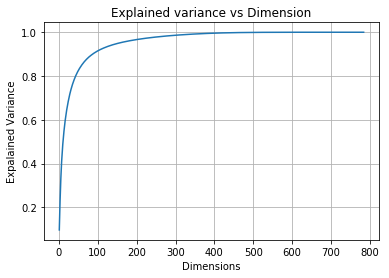

In [12]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_) )
plt.title('Explained variance vs Dimension')
plt.xlabel('Dimensions')
plt.ylabel('Expalained Variance')
plt.grid()
plt.show()

In [13]:
pca=PCA(n_components=300)
X_reduced= pca.fit_transform(X_train)
print(sum(pca.explained_variance_ratio_))
print(pca.n_components_)

0.9860752543778264
300


In [14]:
X_recovered= pca.inverse_transform(X_reduced)

In [15]:
def plot_digits(instances, images_per_row=5, **options):
    size=28
    images_per_row= min(len(instances), images_per_row)
    images= [instance.reshape(size, size) for instance in instances]
    n_rows= (len(instances)-1)// images_per_row+1
    row_images=[]
    n_empty= n_rows*images_per_row -len(instances)
    images.append(np.zeros((size, size*n_empty)))
    for row in range(n_rows):
        rimages= images[row*images_per_row: (row+1)*images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image= np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap= mpl.cm.binary, **options)
    plt.axis('off')

Text(0.5,1,'Compressed')

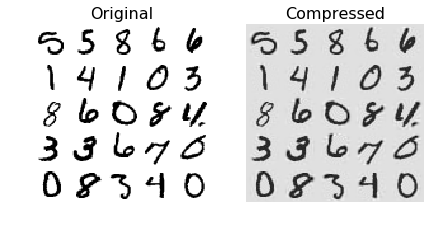

In [16]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [17]:
#Incremental PCA

from sklearn.decomposition import IncrementalPCA

n_batches=100
inc_pca= IncrementalPCA(n_components=300)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced= inc_pca.transform(X_train)

In [18]:
sum(inc_pca.explained_variance_ratio_)

0.9858885485916936

In [19]:
X_inv= inc_pca.inverse_transform(X_reduced)

Text(0.5,1,'Compressed')

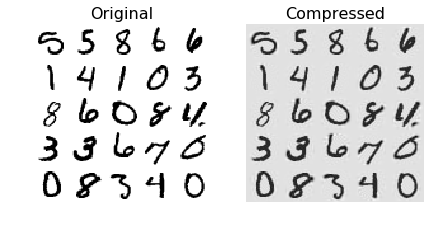

In [20]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_inv[::2100])
plt.title("Compressed", fontsize=16)

In [21]:
np.allclose(pca.mean_,inc_pca.mean_)

True

In [22]:
filename='my_mnist1.data'
m,n= X_train.shape

X_mm= np.memmap(filename, dtype='float32', mode='write', shape=(m,n))
X_mm= X_train

In [23]:
del X_mm

In [24]:
X_mm= np.memmap(filename, dtype='float32', mode='readonly', shape=(m,n))

batch_size= m//n_batches
inc_pca= IncrementalPCA(n_components=300, batch_size=batch_size)
inc_pca.fit(X_mm)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\decomposition\incremental_pca.py:259: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio = S ** 2 / np.sum(col_var * n_total_samples)


IncrementalPCA(batch_size=525, copy=True, n_components=300, whiten=False)

In [25]:
#Randomized PCA

rnd_pca= PCA(n_components=300, svd_solver= 'randomized', random_state=123)
X_reduced= rnd_pca.fit_transform(X_train)

In [26]:
#Time complexity

import time

for n_components in (2, 10, 154, 300):
    print('n_components: ', n_components)
    regular_pca= PCA(n_components=n_components)
    inc_pca= IncrementalPCA(n_components=n_components)
    rnd_pca= PCA(n_components=n_components, random_state= 123, svd_solver='randomized')
    
    for pca in (regular_pca, inc_pca, rnd_pca):
        t1=time.time()
        pca.fit(X_train)
        t2=time.time()
        print("   {}: {:.1f} seconds".format(pca.__class__.__name__, t2-t1))

n_components:  2
   PCA: 1.5 seconds
   IncrementalPCA: 10.2 seconds
   PCA: 1.5 seconds
n_components:  10
   PCA: 1.6 seconds
   IncrementalPCA: 10.1 seconds
   PCA: 1.6 seconds
n_components:  154
   PCA: 4.4 seconds
   IncrementalPCA: 10.6 seconds
   PCA: 4.0 seconds
n_components:  300
   PCA: 7.2 seconds
   IncrementalPCA: 10.6 seconds
   PCA: 7.3 seconds


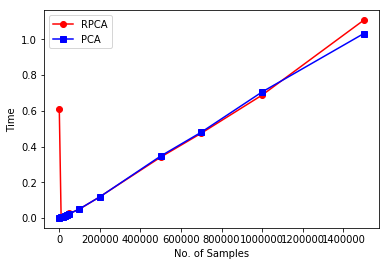

In [27]:
times_rpca=[]
times_pca=[]
sizes=[1000, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 500000, 700000, 1000000, 1500000]
for n_samples in sizes:
    X= np.random.randn(n_samples, 3)
    pca= PCA(n_components=2, svd_solver='randomized', random_state=45)
    t1=time.time()
    pca.fit(X)
    t2=time.time()
    times_rpca.append(t2-t1)
    
    pca= PCA(n_components=2)
    t1=time.time()
    pca.fit(X)
    t2=time.time()
    times_pca.append(t2-t1)

plt.plot(sizes, times_rpca, 'r-o', label='RPCA')
plt.plot(sizes, times_pca, 'b-s', label='PCA')
plt.xlabel('No. of Samples')
plt.ylabel('Time')
plt.legend()
plt.show()

Text(0.5,1,'PCA and Randomized PCA time complexity ')

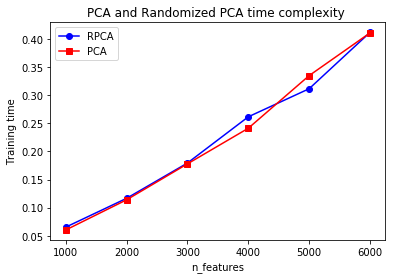

In [28]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

In [29]:
#Kernel PCA

from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, t= make_swiss_roll(n_samples=10000, noise=0.2, random_state=123)

(-12, 15)

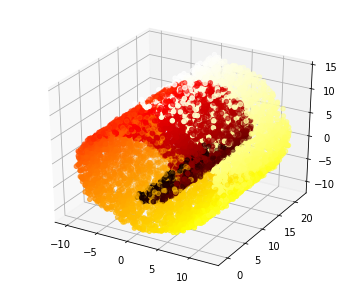

In [30]:
axes = [-11.5, 14, -2, 23, -12, 15]
fig= plt.figure(figsize=(6,5))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=mpl.cm.hot)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

In [31]:
from sklearn.decomposition import KernelPCA

rbf_pca= KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced= rbf_pca.fit_transform(X)

In [32]:
lin_pca= KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_pca= KernelPCA(n_components=2, kernel='rbf', gamma=0.0443, fit_inverse_transform=True)
sigmoid_pca= KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, fit_inverse_transform=True)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


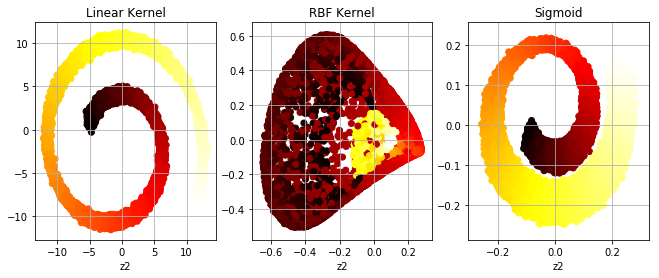

In [33]:
y=t>6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, 'Linear Kernel'), (132, rbf_pca, 'RBF Kernel'), (133, sigmoid_pca, 'Sigmoid')):
    X_reduced= pca.fit_transform(X)
    if subplot==132:
        X_reduced_rbf= X_reduced
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=mpl.cm.hot)
    plt.xlabel('z1')
    plt.xlabel('z2')
    plt.grid('True')
    
plt.show()

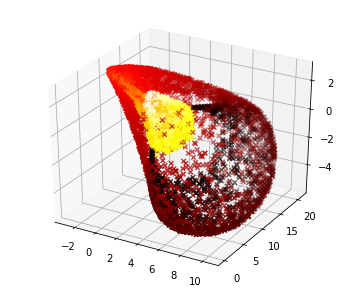

In [34]:
plt.figure(figsize=(6,5))

X_inverse= rbf_pca.inverse_transform(X_reduced_rbf)

ax= plt.subplot(111, projection='3d')
ax.scatter(X_inverse[:,0], X_inverse[:,1], X_inverse[:,2], c=t, cmap= mpl.cm.hot, marker='x')
plt.show()

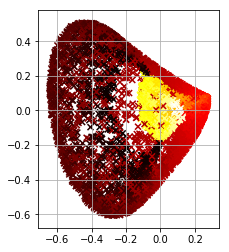

In [35]:
X_reduced= rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.grid(True)
plt.show()

In [36]:
# Tuning Hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [37]:
clf= Pipeline([
        ('kpca', KernelPCA(n_components=2)),
        ('log_reg', LogisticRegression(solver='liblinear'))
])

param_grid= [{
        'kpca__gamma': np.linspace(0.03, 0.05, 10),
        'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search= GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print(grid_search.best_params_)

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}


In [39]:
rbf_pca= KernelPCA(n_components=2, kernel='rbf', gamma=0.05, fit_inverse_transform=True)
X_reduced= rbf_pca.fit_transform(X)
X_preimage= rbf_pca.inverse_transform(X_reduced)

In [40]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.98697279664241

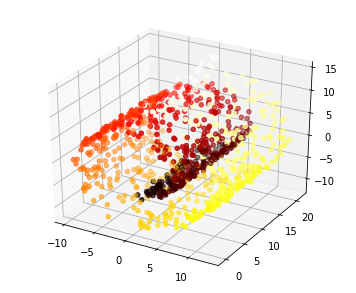

In [41]:
# LLE

X, t= make_swiss_roll(n_samples=1000, noise=0.2, random_state=22)

fig= plt.figure(figsize=(6,5))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=mpl.cm.hot)

In [42]:
from sklearn.manifold import LocallyLinearEmbedding

lle= LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=32)
X_reduced= lle.fit_transform(X)

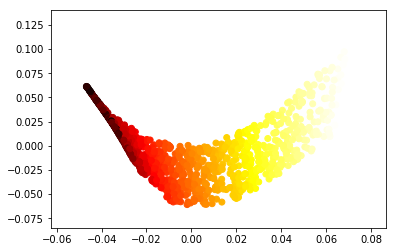

In [43]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=mpl.cm.hot)

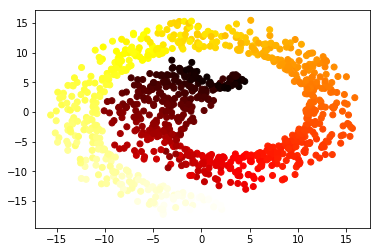

In [44]:
# MDS

from sklearn.manifold import MDS

mds= MDS(n_components=2, random_state=21)
X_reduced= mds.fit_transform(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=mpl.cm.hot)

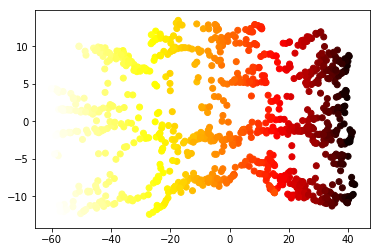

In [45]:
# ISO Map

from sklearn.manifold import Isomap

isomap= Isomap(n_components=2)
X_reduced= isomap.fit_transform(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=mpl.cm.hot)

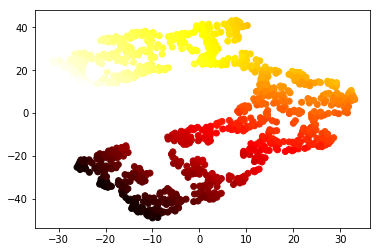

In [46]:
# t-SNE

from sklearn.manifold import TSNE

tsne= TSNE(n_components=2, random_state=31)
X_reduced= tsne.fit_transform(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=mpl.cm.hot)

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda= LinearDiscriminantAnalysis(n_components=2)
X_mnist= mnist['data']
y_mnist= mnist['target']
lda.fit(X_mnist, y_mnist)
X_reduced_lda= lda.transform(X_mnist)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [48]:
X_reduced.shape

(1000, 2)

In [49]:
# Clustering

In [50]:
from sklearn.datasets import load_iris

data= load_iris()
X= data.data
y= data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

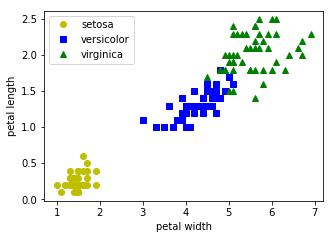

In [51]:
plt.figure(figsize=(11, 3.5))

plt.subplot(121)
plt.plot(X[y==0,2], X[y==0,3], 'yo', label='setosa')
plt.plot(X[y==1,2], X[y==1,3], 'bs', label='versicolor')
plt.plot(X[y==2,2], X[y==2,3], 'g^', label='virginica')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()
plt.show()

In [52]:
from sklearn.mixture import GaussianMixture

y_pred= GaussianMixture(n_components=3, random_state=123).fit(X).predict(X)
print(y_pred)
mapping=np.array([2,0,1])
y_pred= np.array([mapping[cluster_id] for cluster_id in y_pred])
#print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


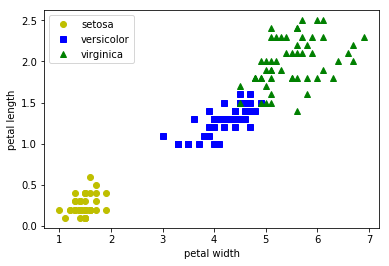

In [53]:


plt.plot(X[y_pred==0,2], X[y_pred==0,3], 'yo', label='setosa')
plt.plot(X[y_pred==1,2], X[y_pred==1,3], 'bs', label='versicolor')
plt.plot(X[y_pred==2,2], X[y_pred==2,3], 'g^', label='virginica')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()
plt.show()

In [54]:
np.sum(y_pred==y)

145

In [55]:
np.sum(y_pred==y)/len(y)

0.9666666666666667

In [56]:
# K-Means

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])


X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

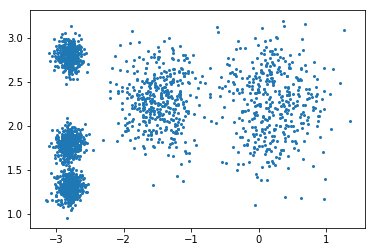

In [57]:
def plot_cluster(X, y=None):
    plt.scatter(X[:, 0], X[:,1], c=y, s=4)
    
plot_cluster(X)

In [58]:
from sklearn.cluster import KMeans

k=5
kmeans= KMeans(n_clusters=k, random_state=123)
y_pred= kmeans.fit_predict(X)

y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [59]:
y_pred is kmeans.labels_

True

In [60]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

In [61]:
X_new= np.array([[0,2], [3,2], [-3, 3], [-3, -3]])
kmeans.predict(X_new)

array([1, 1, 2, 0])

In [62]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, col='w'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', linewidth=10, color= col, zorder=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', linewidth=8, color='cyan', zorder=10)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    mins= X.min(axis=0) -0.1
    maxs= X.max(axis=0) +0.1
    xx, yy= np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
    Z= clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(Z, extent= (mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent= (mins[0], maxs[0], mins[1], maxs[1]), linewidth=1, colors='k')
    plot_data(X)
    #plot_cluster(X)
    plot_centroids(clusterer.cluster_centers_)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


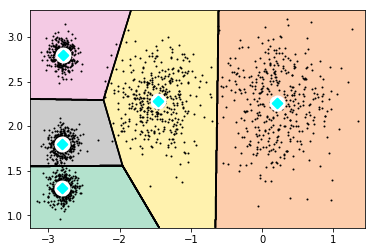

In [63]:
plot_decision_boundaries(kmeans, X)

In [64]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [4.30545595, 6.15764412, 5.80010907, 5.50372253, 4.80518325]])

In [65]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) -kmeans.cluster_centers_, axis=2)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [4.30545595, 6.15764412, 5.80010907, 5.50372253, 4.80518325]])

In [66]:
kmeans_iter1= KMeans(n_clusters=5, n_init=1, algorithm='full', max_iter=1, random_state=36)
kmeans_iter2= KMeans(n_clusters=5, n_init=1, algorithm='full', max_iter=2, random_state=36)
kmeans_iter3= KMeans(n_clusters=5, n_init=1, algorithm='full', max_iter=3, random_state=36)
kmeans_iter4= KMeans(n_clusters=5, n_init=1, algorithm='full', max_iter=4, random_state=36)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
kmeans_iter4.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=4,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=36, tol=0.0001, verbose=0)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


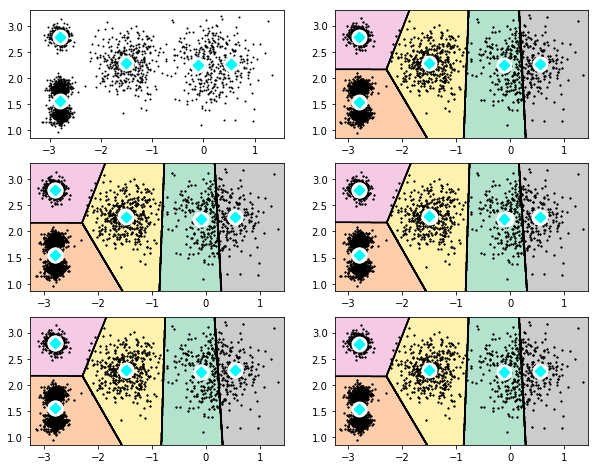

In [67]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_)

plt.subplot(322)
plot_data(X)
plot_decision_boundaries(kmeans_iter1, X)

plt.subplot(323)
plot_data(X)
plot_decision_boundaries(kmeans_iter1, X)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_data(X)
plot_decision_boundaries(kmeans_iter2, X)
plot_centroids(kmeans_iter1.cluster_centers_)

plt.subplot(325)
plot_data(X)
plot_decision_boundaries(kmeans_iter2, X)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(326)
plot_data(X)
plot_decision_boundaries(kmeans_iter1, X)

In [68]:
def plot_cluster_comparison(clusterer1, clusterer2, X):
    clusterer1.fit(X)
    clusterer2.fit(X)
    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X)
    

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


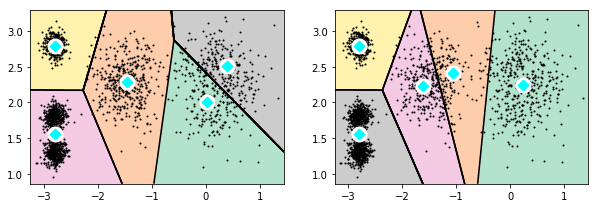

In [69]:
kmeans_rnd_init1= KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', random_state=11)
kmeans_rnd_init2= KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', random_state=19)

plot_cluster_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X)

In [70]:
# Inertia

kmeans.inertia_

211.5985372581684

In [71]:
X_dist= kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [72]:
kmeans.score(X)

-211.59853725816856

In [73]:
kmeans_rnd_init1.inertia_

223.29108572819035

In [74]:
kmeans_rnd_init2.inertia_

237.46249169442845

In [75]:
kmeans_rnd_10inits= KMeans(n_clusters=5, init='random', n_init=10, algorithm='full', random_state=22)

kmeans_rnd_10inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=22, tol=0.0001, verbose=0)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


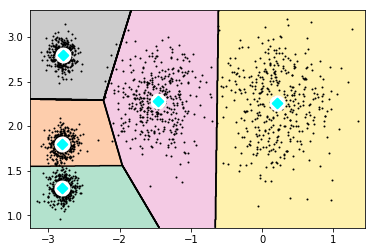

In [76]:
plot_decision_boundaries(kmeans_rnd_10inits, X)
plt.show()

In [77]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

In [79]:
%timeit -n 50 KMeans(algorithm='elkan').fit(X)

52.4 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [80]:
%timeit -n 50 KMeans(algorithm='full').fit(X)

65.8 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [81]:
from sklearn.cluster import MiniBatchKMeans
mb_kmeans= MiniBatchKMeans(n_clusters=5, random_state=124)
mb_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=124, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [82]:
mb_kmeans.inertia_

211.80153832713575

In [83]:
filename= 'my_mnist.data'
m,n= 5000, 28*28
X_mm= np.memmap(filename, dtype='float32', mode='readonly', shape=(m,n))

In [84]:
mb_kmeans= MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=12)
mb_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=12, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


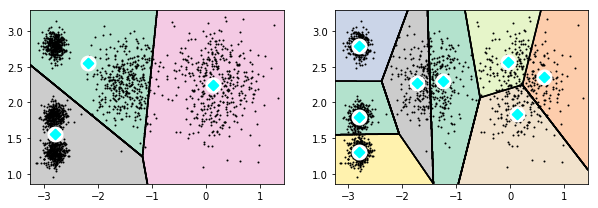

In [85]:
# Optimal Number of clusters

kmeans_k3= KMeans(n_clusters=3, random_state=42)
kmeans_k8= KMeans(n_clusters=8, random_state=42)

plot_cluster_comparison(kmeans_k3, kmeans_k8, X)
plt.show()

In [86]:
kmeans_k3.inertia_

653.2167190021553

In [87]:
kmeans_k8.inertia_

119.11983416102879

In [88]:
kmeans_per_k= [KMeans(n_clusters=k, random_state=123).fit(X) for k in range(1, 21)]
inertias= [model.inertia_ for model in kmeans_per_k]

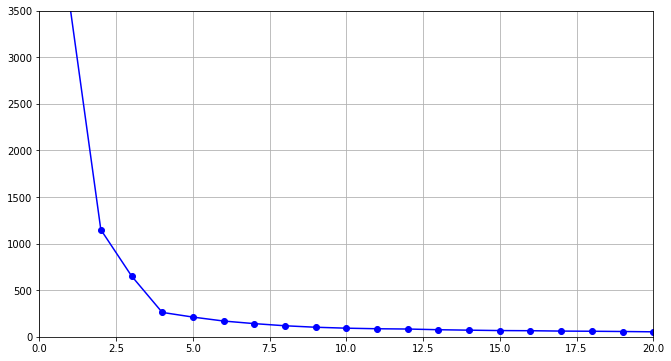

In [89]:
plt.figure(figsize=(11, 6))
plt.plot(range(1, 21), inertias ,'bo-')
plt.axis([0, 20, 0, 3500])
plt.grid()
plt.show()

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


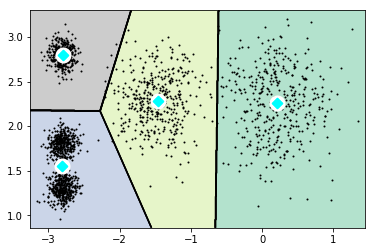

In [90]:
plot_decision_boundaries(kmeans_per_k[3], X)

In [91]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

In [92]:
sil_scores= [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

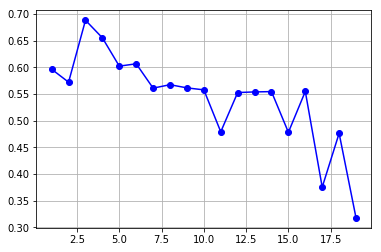

In [93]:
plt.plot(range(1, 20), sil_scores, 'bo-')
plt.grid()

In [94]:
# K-Means Limitations

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

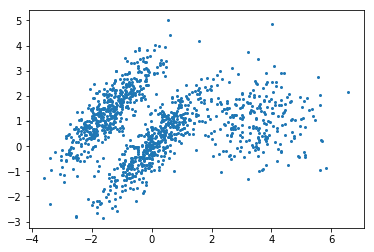

In [95]:
plot_cluster(X)

In [96]:
kmeans_good= KMeans(n_clusters=3, init= np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=123)
kmeans_bad= KMeans(n_clusters=3, random_state=123)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


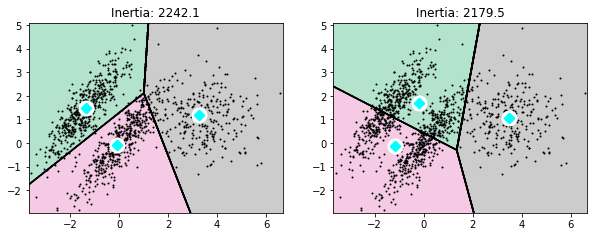

In [97]:
plt.figure(figsize=(10, 3.5))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title('Inertia: {:.1f}'.format(kmeans_good.inertia_))

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X)
plt.title('Inertia: {:.1f}'.format(kmeans_bad.inertia_))
plt.show()

In [98]:
#Image Segmentation using CLustering

from matplotlib.image import imread
image= imread(os.path.join('ladybug.png'))
image.shape

(533, 800, 3)

In [99]:
X= image.reshape(-1, 3)
kmeans= KMeans(n_clusters=8, random_state=123).fit(X)
segmented_img= kmeans.cluster_centers_[kmeans.labels_]
segmented_img= segmented_img.reshape(image.shape)

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

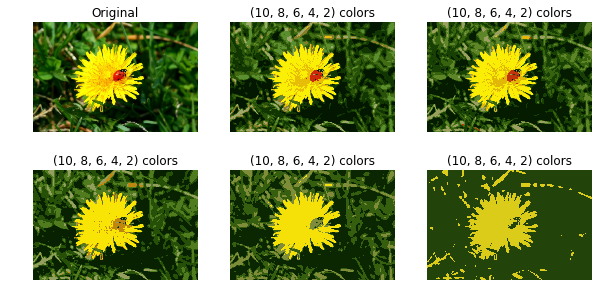

In [100]:
plt.figure(figsize=(10,5))
#plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_colors))
    plt.axis('off')
    
plt.show()

In [101]:
from sklearn.datasets import load_digits

X_digits, y_digits= load_digits(return_X_y=True)

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_digits, y_digits, random_state=123)

In [103]:
from sklearn.linear_model import LogisticRegression

log_reg= LogisticRegression(multi_class='ovr', solver='liblinear', random_state=123)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
log_reg.score(X_test, y_test)

0.9622222222222222

In [105]:
pipeline= Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=123)),
    ('log_reg', LogisticRegression(multi_class='ovr', solver='liblinear', random_state=123))
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [106]:
pipeline.score(X_test, y_test)

0.9733333333333334

In [107]:
1- (1-0.9733)/(1-0.9622)

0.29365079365079405

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid= dict(kmeans__n_clusters=range(2,100))
grid_clf= GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................
[CV] ............................. kmeans__n_clusters=5, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=22, total=   0.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.1s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.1s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.1s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.1s
[CV] kmeans__n_clusters=25 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=42, total=   0.2s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.2s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.2s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.2s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.2s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.2s
[CV] kmeans__n_clusters=44 ...........................................
[CV] ............................ kmeans__n_clusters=44, total=   0.2s
[CV] kmeans__n_clusters=44 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=61, total=   0.3s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.3s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.3s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.3s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.3s
[CV] kmeans__n_clusters=63 ...........................................
[CV] ............................ kmeans__n_clusters=63, total=   0.3s
[CV] kmeans__n_clusters=63 ...........................................
[CV] ............................ kmeans__n_clusters=63, total=   0.3s
[CV] kmeans__n_clusters=63 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=80, total=   0.4s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.4s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.4s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.4s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   0.4s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   0.4s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   0.4s
[CV] kmeans__n_clusters=83 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, du...ty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kmeans__n_clusters': range(2, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [109]:
grid_clf.best_params_

{'kmeans__n_clusters': 74}

In [110]:
grid_clf.score(X_train, y_train)

1.0

In [111]:
# Clustering in Semi-Supervised learning

n_labeled=50
log_reg= LogisticRegression(multi_class='ovr', solver='liblinear', random_state=123)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8155555555555556

In [112]:
k=50

kmeans= KMeans(n_clusters=k, random_state=123)
X_digits_dist= kmeans.fit_transform(X_train)
representative_digit_idx= np.argmin(X_digits_dist, axis=0)
X_representative_digits= X_train[representative_digit_idx]

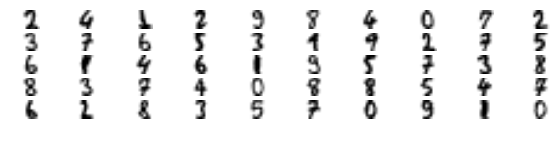

In [113]:
plt.figure(figsize=(10,2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k//10, 10, index+1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap='binary', interpolation='bilinear')
    plt.axis('off')
plt.show()

In [114]:
y_representative_digits= np.array([2,4,1,2,9,8,4,0,7,2,3,7,6,5,3,4,9,2,7,5,6,
                                   1,4,6,1,9,5,7,3,8,8,3,7,4,0,8,8,5,4,7,6,2,8,3,5,7,0,9,1,0])

In [115]:
log_reg= LogisticRegression(multi_class='ovr', solver='liblinear', random_state=123)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8888888888888888

In [116]:
percentile_cost=20

X_cluster_dist= X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster= (kmeans.labels_==i)
    cluster_dist= X_cluster_dist[in_cluster]
    cutoff_distance= np.percentile(cluster_dist, percentile_cost)
    above_cutoff= (X_cluster_dist> cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff]=-1

In [117]:
partially_propagated= (X_cluster_dist !=-1)
X_train_partially_propagated= X_train[partially_propagated]
y_train_partially_propagated= y_train[partially_propagated]

In [118]:
log_reg= LogisticRegression(multi_class='ovr', solver='liblinear', random_state=123)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
log_reg.score(X_test, y_test)

0.92

In [120]:
np.mean(y_train_partially_propagated==y_train[partially_propagated])

1.0

In [121]:
# DBSCANS

from sklearn.datasets import make_moons

X, y= make_moons(n_samples=1000, noise=0.05, random_state=13)

In [122]:
from sklearn.cluster import DBSCAN

dbscan= DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [123]:
dbscan.labels_[:10]

array([0, 2, 1, 2, 0, 3, 4, 0, 3, 5], dtype=int64)

In [124]:
len(dbscan.core_sample_indices_)

786

In [125]:
dbscan.core_sample_indices_[:10]

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [126]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [127]:
dbscan2= DBSCAN(eps=0.02)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.02, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [128]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

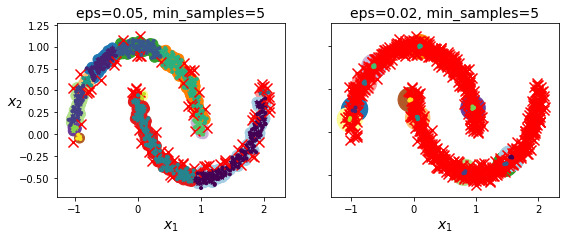

In [129]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [130]:
X_train= mnist['data'][:60000]
y_train= mnist['target'][:60000]

X_test= mnist['data'][60000:]
y_test= mnist['target'][60000:]

In [131]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf= RandomForestClassifier(n_estimators=10, random_state=23)

import time

t0=time.time()
rnd_clf.fit(X_train, y_train)
t1= time.time()
print('Training time: {:.3f} seconds'.format(t1-t0))

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Training time: 3.273 seconds


In [132]:
from sklearn.metrics import accuracy_score

y_pred= rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9469

In [136]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
X_train_reduced= pca.fit_transform(X_train)

rnd_clf2= RandomForestClassifier(n_estimators=10, random_state=23)

t0=time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1= time.time()
print('Training time: {:.3f} seconds'.format(t1-t0))


X_test_reduced= pca.transform(X_test)
y_pred= rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)


Training time: 7.793 seconds


0.8947

In [137]:
from sklearn.linear_model import LogisticRegression

log_clf= LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

t0=time.time()
log_clf.fit(X_train, y_train)
t1= time.time()
print('Training time: {:.3f} seconds'.format(t1-t0))

y_pred= log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

Training time: 16.765 seconds


0.9255

In [138]:
log_clf2= LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

t0=time.time()
log_clf2.fit(X_train_reduced, y_train)
t1= time.time()
print('Training time: {:.3f} seconds'.format(t1-t0))

y_pred= log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

Training time: 6.196 seconds


0.9201

In [145]:
np.random.seed(123)

m=10000
idx= np.random.permutation(60000)[:m]

X=mnist['data'][idx]
y=mnist['target'][idx]

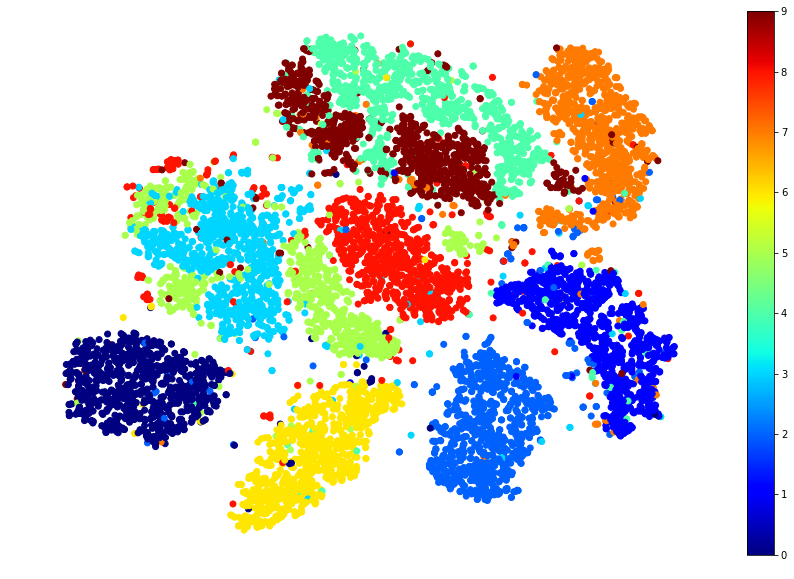

In [146]:
from sklearn.manifold import TSNE

tsne= TSNE(n_components=2, random_state=123)
X_reduced= tsne.fit_transform(X)


plt.figure(figsize=(15, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

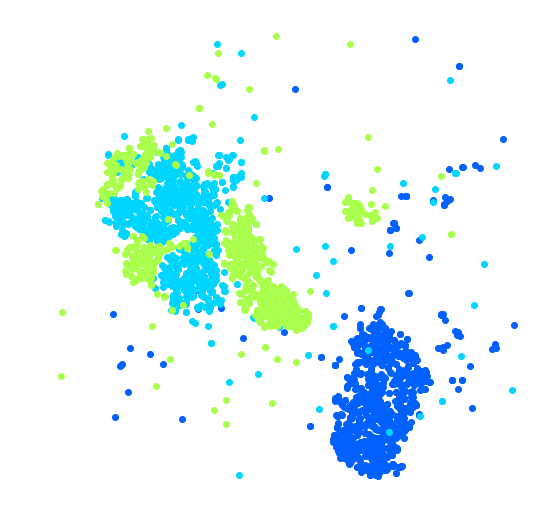

In [148]:
plt.figure(figsize=(9,9))
cmap= mpl.cm.get_cmap('jet')
for digits in (2, 3, 5):
    plt.scatter(X_reduced[y== digits, 0], X_reduced[y== digits, 1], c=[cmap(digits/9)])
plt.axis('off')
plt.show()

In [149]:
idx=(y==2) |(y==3) |(y==5)
X_subset= X[idx]
y_subset= y[idx]

tsne_subset= TSNE(n_components=2, random_state=23)
X_subset_reduced= tsne_subset.fit_transform(X_subset)

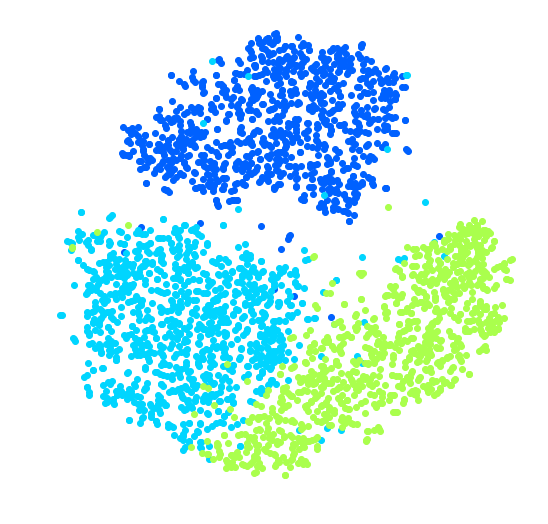

In [151]:
plt.figure(figsize=(9,9))
for digit in (2,3,5):
    plt.scatter(X_subset_reduced[y_subset==digit, 0], X_subset_reduced[y_subset==digit, 1], c=[cmap(digit/9)])
plt.axis('off')
plt.show()

In [159]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(15, 10)):
    X_normalized= MinMaxScaler().fit_transform(X)
    neighbors=np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax= plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance= np.linalg.norm(np.array(neighbors)-image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors=np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])), 
                        color=cmap(y[index]/9), fontdict={"weight": "bold", "size":16})
            else:
                image= images[index].reshape(28, 28)
                imagebox= AnnotationBbox(OffsetImage(image, cmap='binary'), image_coord)
                ax.add_artist(imagebox)

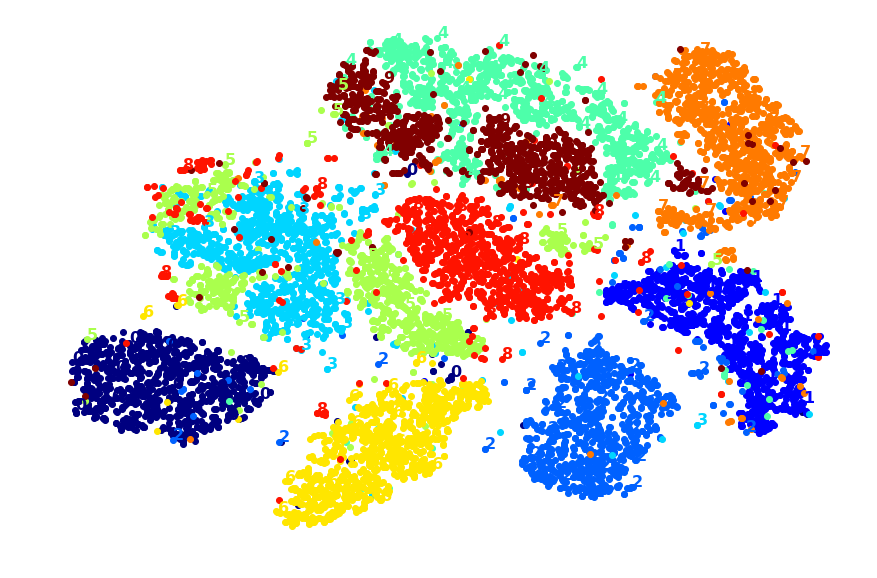

In [160]:
plot_digits(X_reduced, y)

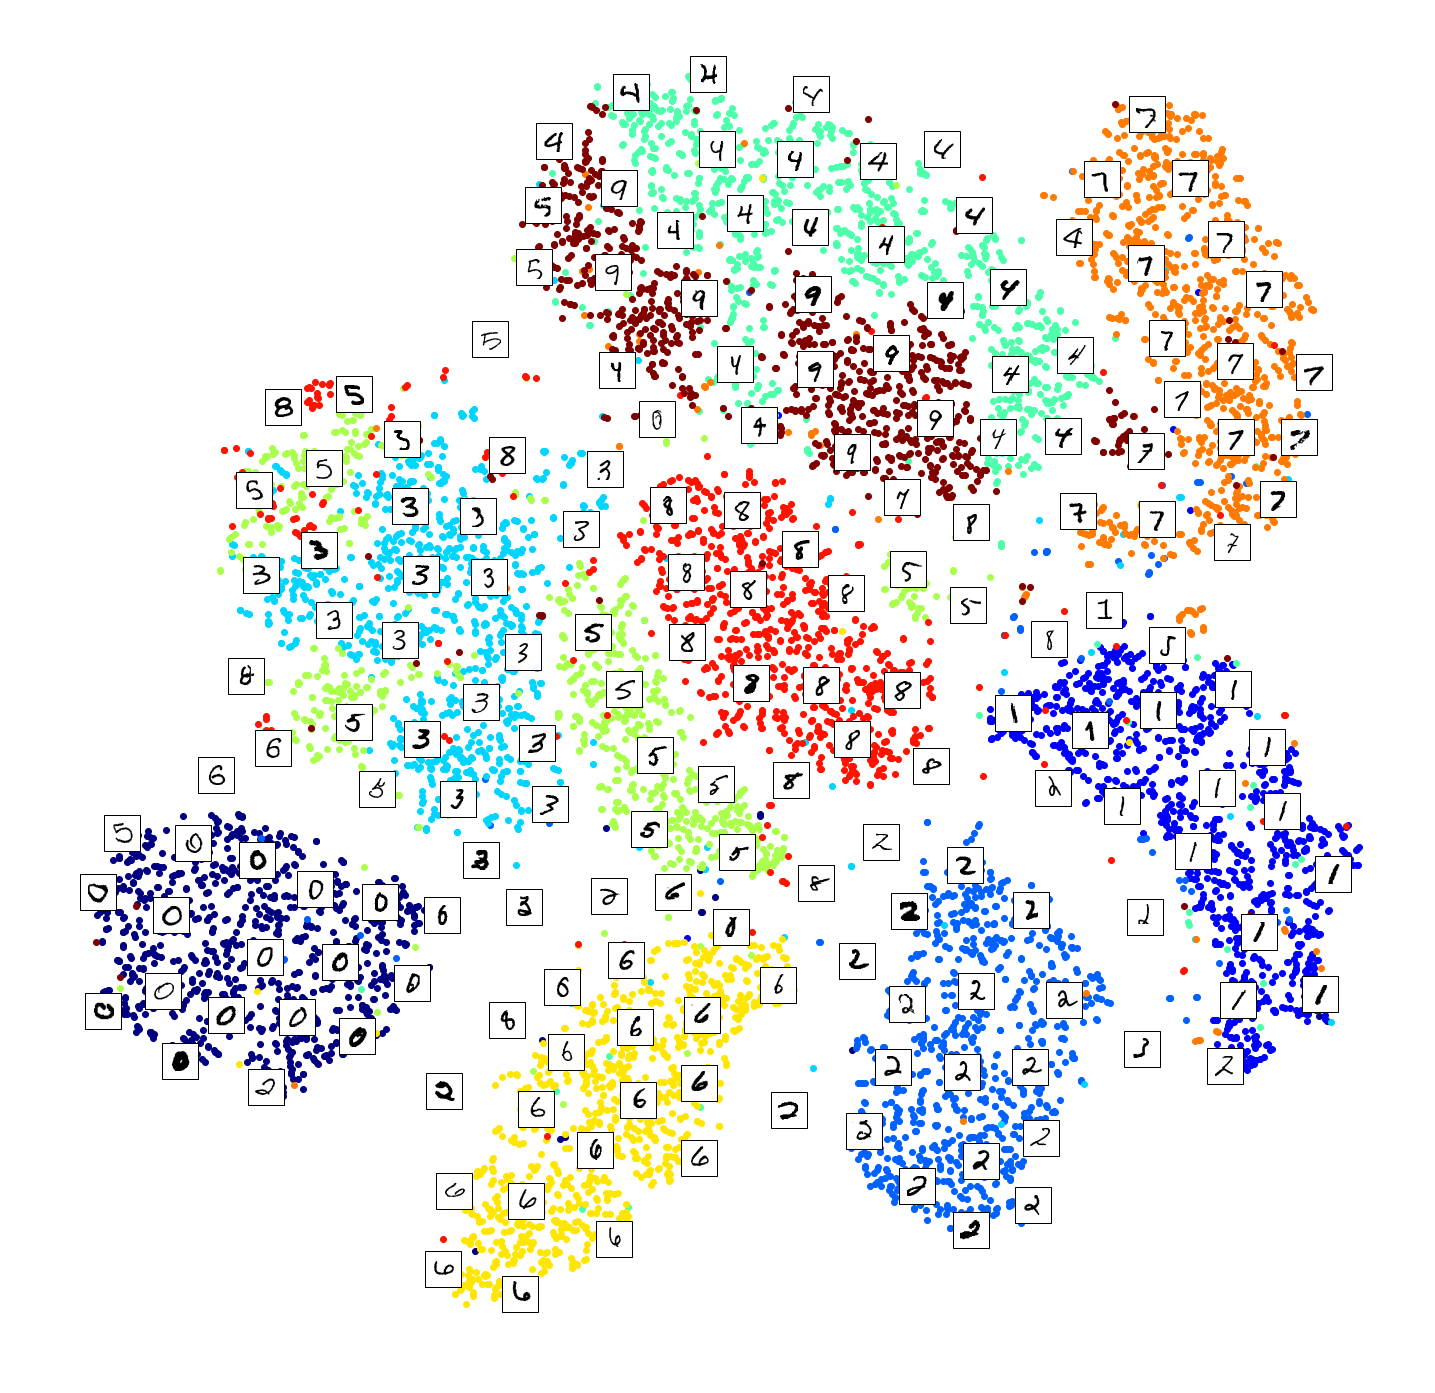

In [161]:
plot_digits(X_reduced, y, images=X, figsize=(25, 25))

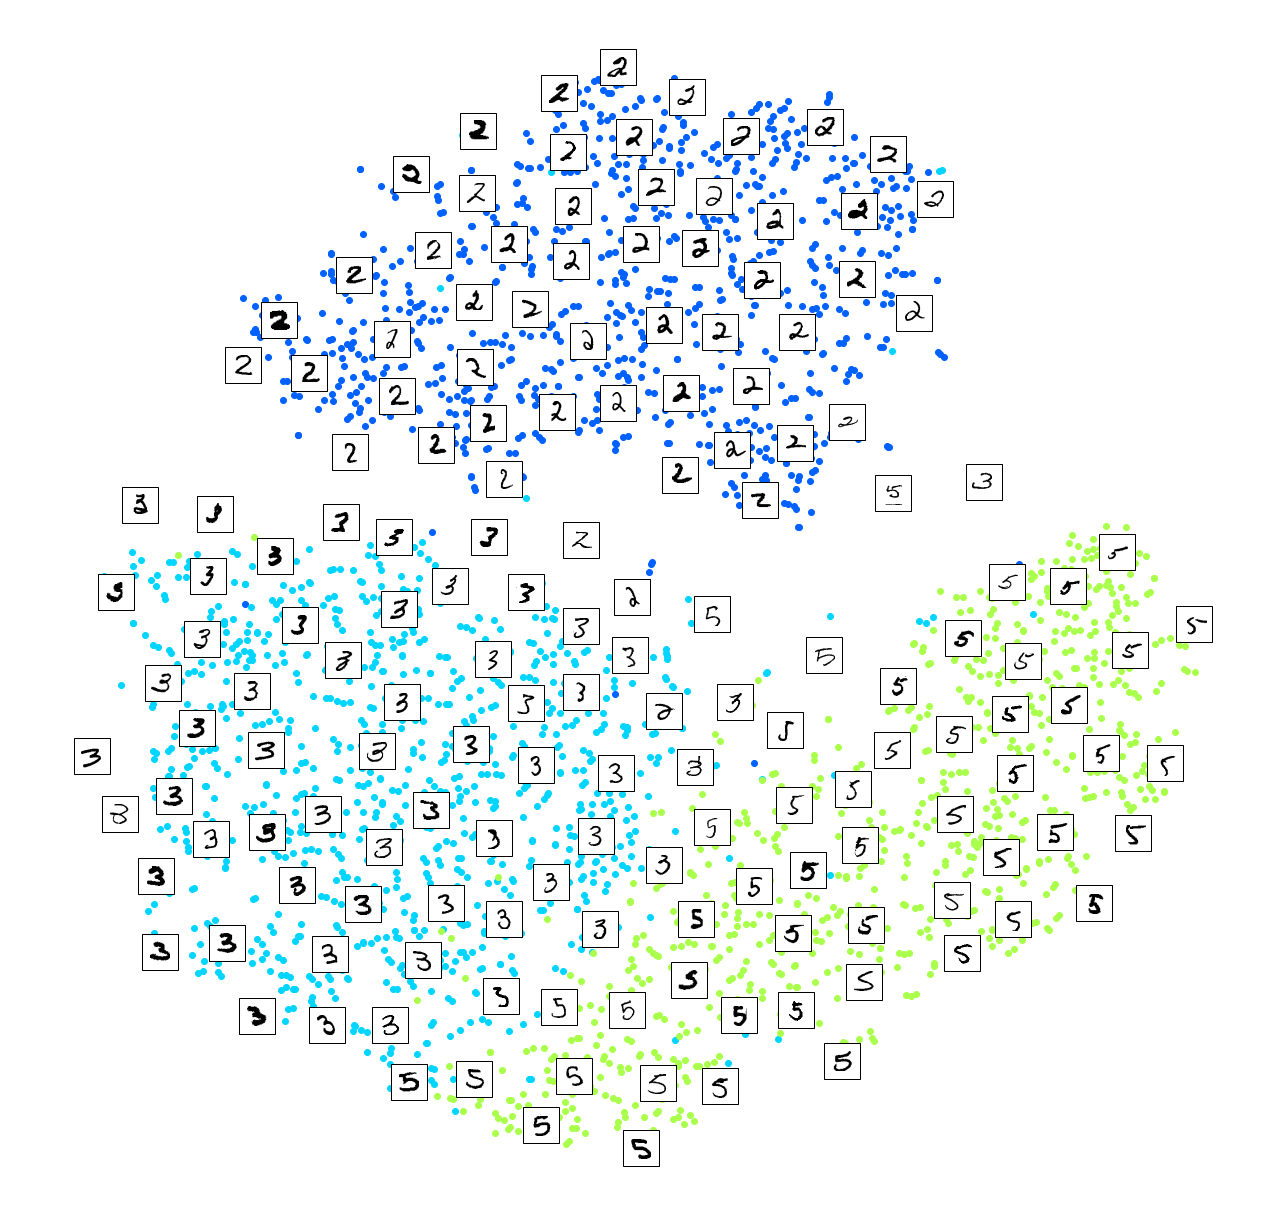

In [162]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22,22))

PCA took 0.3s.


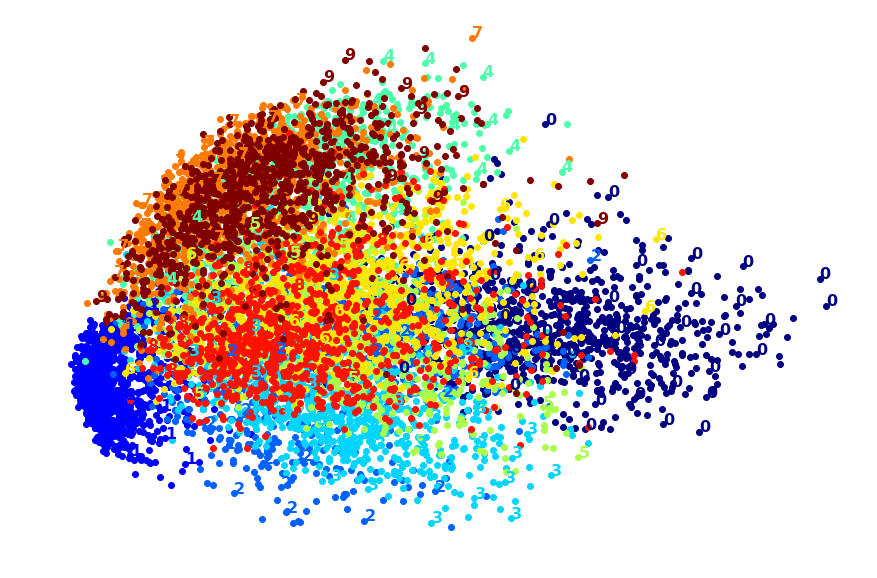

In [163]:
t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

LLE took 155.2s.


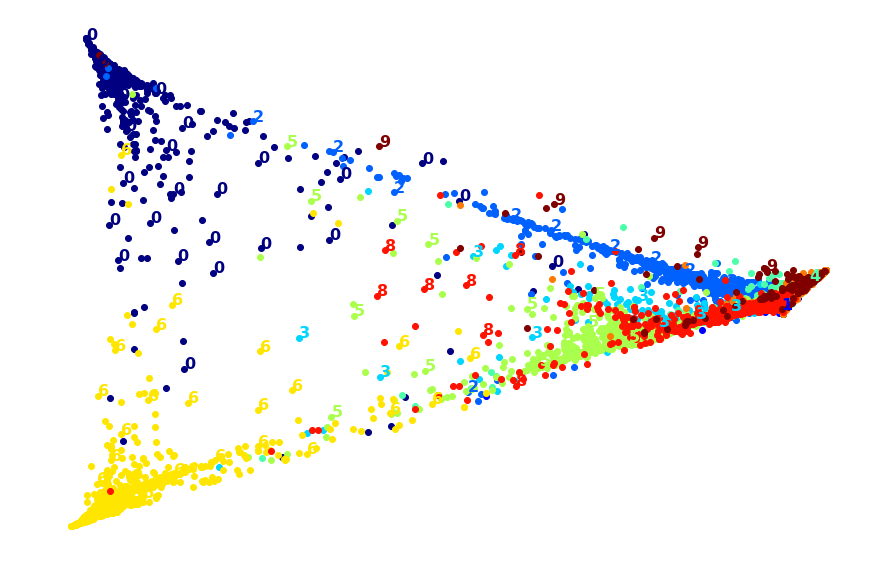

In [164]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE took 48.6s.


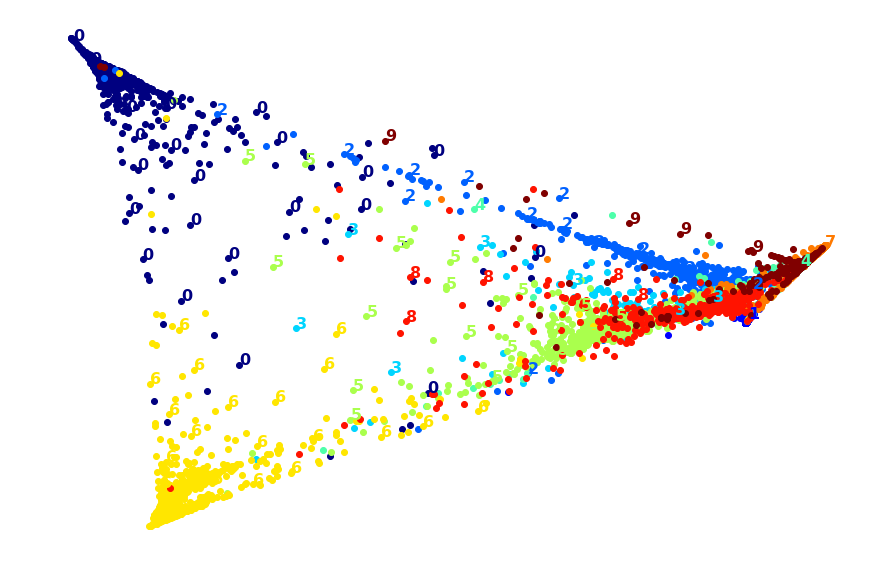

In [167]:
from sklearn.pipeline import Pipeline

pca_lle= Pipeline([
    ('pca', PCA(n_components=0.95, random_state=123)),
    ('lle', LocallyLinearEmbedding(n_components=2, random_state=42))
])

t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

MDS took 139.9s (on just 2,000 MNIST images instead of 10,000).


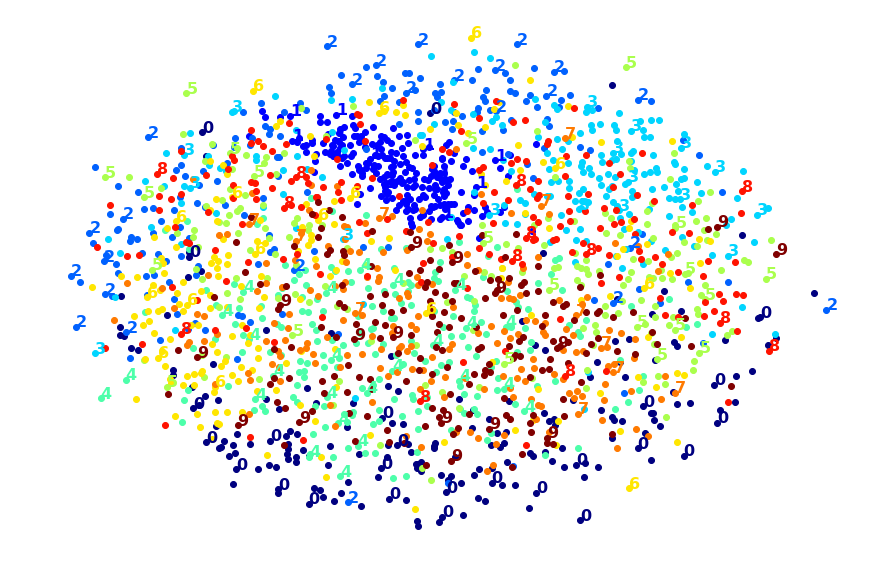

In [168]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

PCA+MDS took 141.9s (on 2,000 MNIST images).


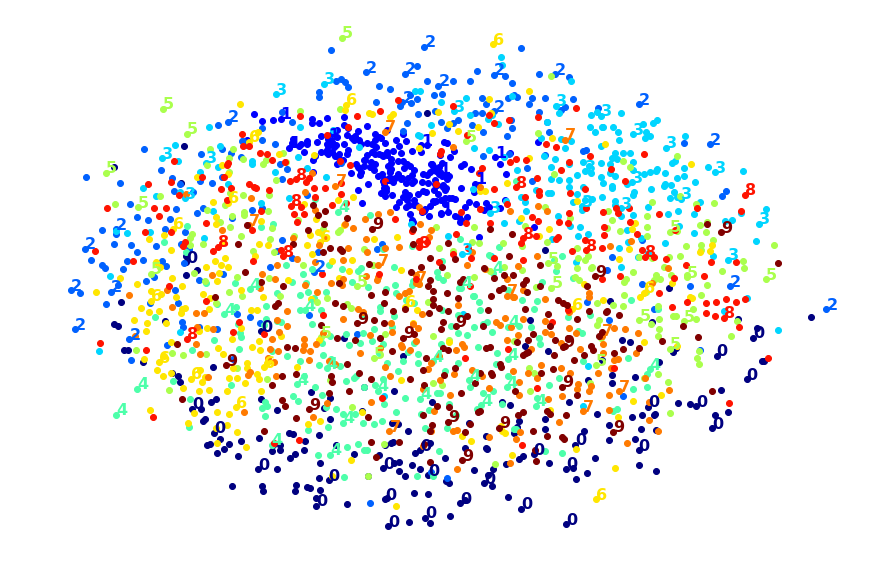

In [169]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA took 1.7s.


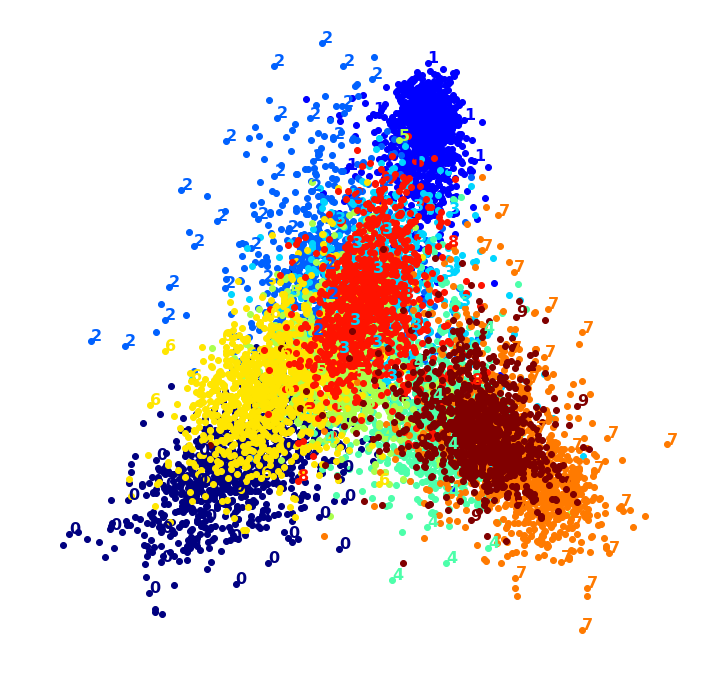

In [170]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

t-SNE took 351.1s.


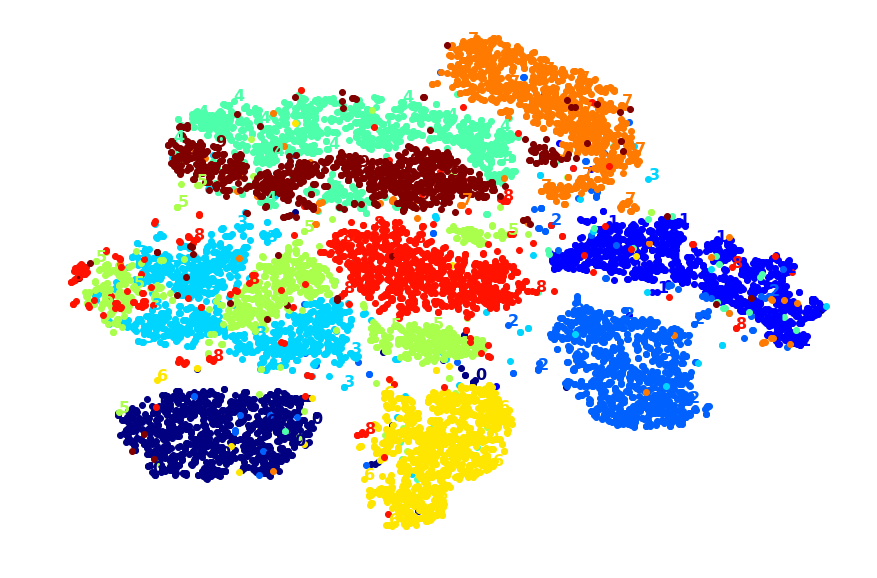

In [171]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

PCA+t-SNE took 259.1s.


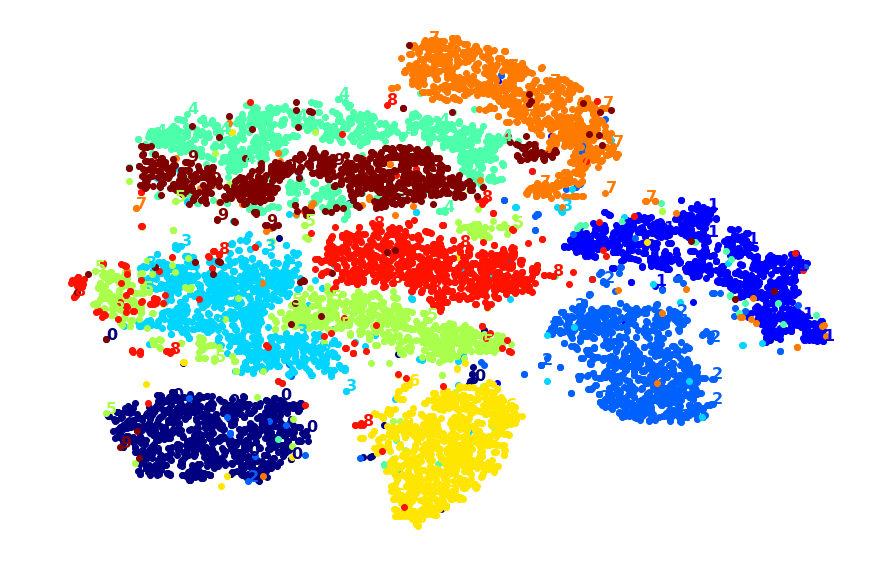

In [172]:

pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()